# Filip Kucia

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from networkx.drawing.nx_pydot import write_dot

In [38]:
def random_stochastic(N: int, seed=None) -> np.array:
    """Returns a random stochastic matrix of shape NxN"""
    np.random.seed(seed)
    M = np.random.rand(N, N)
    for _ in range(np.random.randint(0, N*N)):
        M[np.random.randint(0, N), np.random.randint(0, N)] =0
    
    M = M/M.sum(axis=0)
    np.random.seed() #reset
    return M

M = random_stochastic(5, seed=420)
M.round(2)

array([[0.32, 0.62, 0.15, 0.07, 0.  ],
       [0.64, 0.  , 0.04, 0.42, 0.41],
       [0.  , 0.08, 0.13, 0.  , 0.  ],
       [0.04, 0.  , 0.26, 0.51, 0.59],
       [0.  , 0.31, 0.42, 0.  , 0.  ]])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_g_matplotlib(G):
    """
    Visualize a graph G using matplotlib.
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout for consistent graph drawing
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="lightblue",
        node_size=700,
        font_size=10,
        font_weight="bold",
        edge_color="gray",
    )
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Graph Visualization")
    plt.show()

def visualize_Markov(M):
    """
    Visualize a Markov process matrix M as a graph using matplotlib.
    """
    N = M.shape[0]
    G = nx.MultiDiGraph()
    [G.add_node(n) for n in range(N)]
    for row in range(N):
        for col in range(N):
            rate = M[row, col]
            if rate > 1e-6:
                G.add_edge(col, row, weight=rate, label=np.round(rate, 2))
    plot_g_matplotlib(G)


# 9.1

# Analytical Formula for the Ergodic Density of a Random Walk on a Graph

Let the random walk on a graph be described by its adjacency matrix \( A \), where the Markov operator is defined as:

$$
P_{ji} = \frac{A_{ij}}{k_i}
$$

where:
- \( P \) is the Markov transition matrix.
- \( k \) is the degree vector of the graph, where \( k_i \) represents the degree of the \( i \)-th vertex.
- \( $ [X]_{ij} $ \) denotes the element of matrix \( X \) in row \( i \) and column \( j \).

## Proof of the Stationary Distribution:

1. Start by examining the action of \( P \) on the degree vector \( k \):
   $$
   [Pk]_s = \sum_l P_{sl}k_l
   $$
   Substituting the definition of \( P_{sl} \):
   $$
   [Pk]_s = \sum_l \frac{A_{ls}}{k_l}k_l
   $$
   Simplify:
   $$
   [Pk]_s = \sum_l A_{ls}
   $$
   Since \( $\sum_l A_{ls} $ \) is the degree of vertex \( s \), we have:
   $$
   [Pk]_s = k_s
   $$

2. This implies:
   $$
   Pk = k
   $$

3. Normalize the degree vector \( k \) to obtain a stationary distribution:
   $$
   \dot{k} := \frac{k}{\sum_i k_i}
   $$

Thus, \( \dot{k} \) is the ergodic (stationary) density of the random walk on the graph.


# 9.2 

In [39]:
M

array([[0.31948757, 0.61571286, 0.14822401, 0.07248065, 0.        ],
       [0.63739281, 0.        , 0.03749573, 0.41677278, 0.40943104],
       [0.        , 0.0772668 , 0.13165177, 0.        , 0.        ],
       [0.04311962, 0.        , 0.26047332, 0.51074657, 0.59056896],
       [0.        , 0.30702034, 0.42215517, 0.        , 0.        ]])

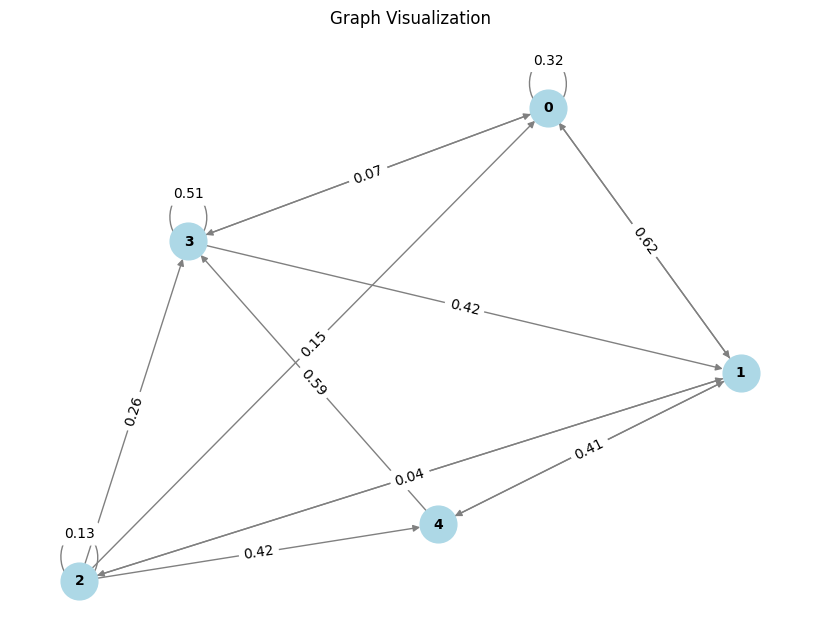

In [40]:
visualize_Markov(M)

In [41]:
eigvalues, eigenvec = scipy.linalg.eig(M)
# eigenvec = np.real(eigenvec)
eigvalues

array([ 1.        +0.j, -0.53056652+0.j,  0.36244909+0.j,  0.12541763+0.j,
        0.00458571+0.j])

In [42]:
np.round(eigenvec, 2)

array([[-0.64, -0.53, -0.51, -0.24,  0.07],
       [-0.65,  0.73, -0.12,  0.01,  0.06],
       [-0.06, -0.08, -0.04, -0.15, -0.04],
       [-0.36,  0.24,  0.83,  0.84, -0.75],
       [-0.22, -0.35, -0.15, -0.47,  0.65]])

In [43]:
pi = eigenvec[: ,np.where(np.abs(eigvalues - 1)<1e-14),]
pi /= pi.sum()
np.round(pi, 2)

array([[[0.33]],

       [[0.34]],

       [[0.03]],

       [[0.19]],

       [[0.12]]])

# 9.3
Determine dynamically (by iterating the Markov operator)ergodic density for the random walk on selected network.

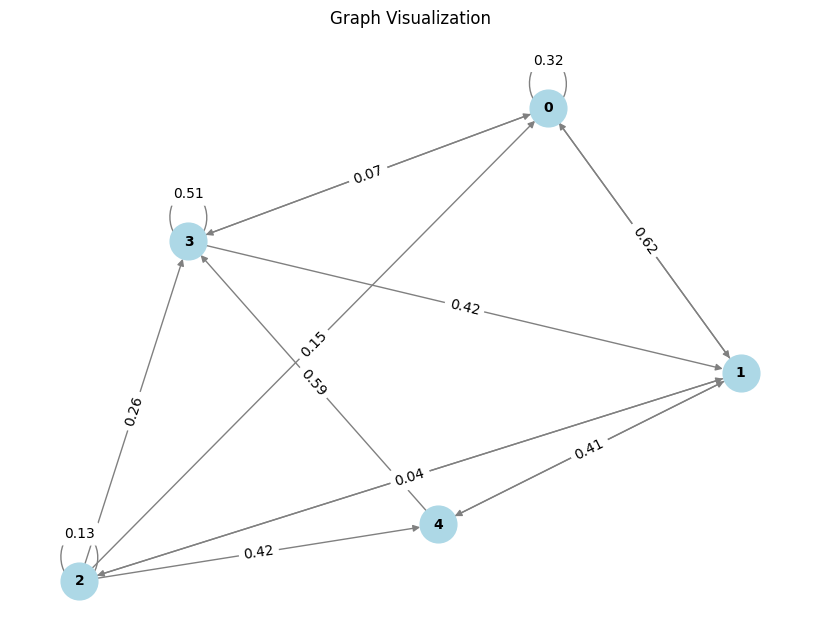

In [44]:
visualize_Markov(M)

In [45]:
new = M.copy()
for i in range(30):
    new= np.dot(new, new)
    new = new/new.sum(0)

In [46]:
new.round(2)

array([[0.33, 0.33, 0.33, 0.33, 0.33],
       [0.34, 0.34, 0.34, 0.34, 0.34],
       [0.03, 0.03, 0.03, 0.03, 0.03],
       [0.19, 0.19, 0.19, 0.19, 0.19],
       [0.12, 0.12, 0.12, 0.12, 0.12]])

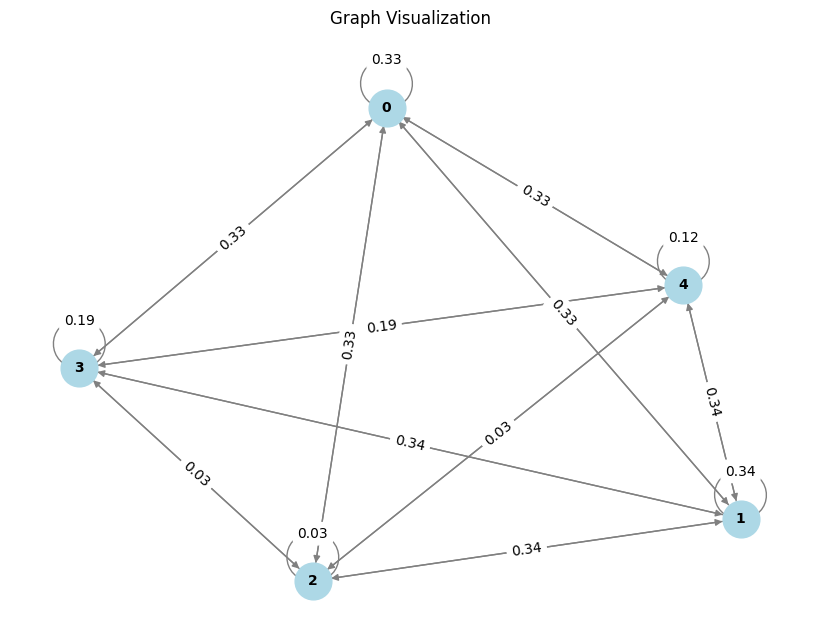

In [47]:
visualize_Markov(new)

#  9.5 
Determine the value of classic or modified pagerank for theselected network.

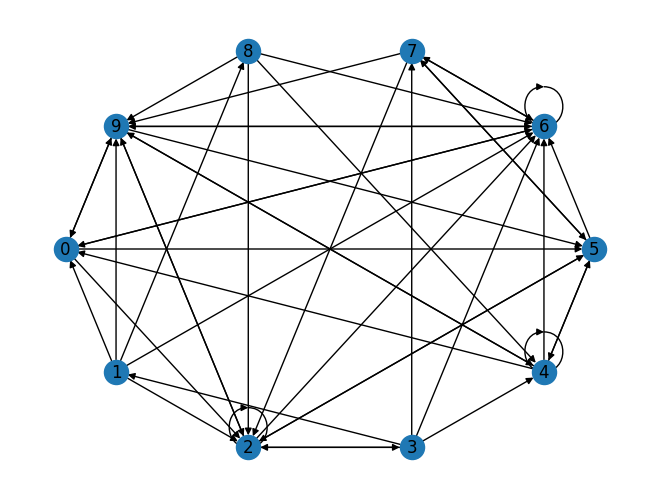

In [66]:
G = nx.DiGraph(nx.directed.random_k_out_graph(10, 8, 0.7, seed=12))
nx.draw_shell(G, with_labels=True)

In [67]:
A = nx.to_numpy_array(G)

# Normalize rows of the adjacency matrix
normalized_A = (A / A.sum(axis=1, keepdims=True)).round(2)

print(normalized_A)

[[0.   0.   0.25 0.   0.   0.25 0.25 0.   0.   0.25]
 [0.2  0.   0.2  0.   0.   0.   0.2  0.   0.2  0.2 ]
 [0.   0.   0.2  0.2  0.   0.2  0.2  0.   0.   0.2 ]
 [0.   0.2  0.2  0.   0.2  0.   0.2  0.2  0.   0.  ]
 [0.2  0.   0.   0.   0.2  0.2  0.2  0.   0.   0.2 ]
 [0.   0.   0.25 0.   0.25 0.   0.25 0.25 0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   0.25 0.25 0.   0.25]
 [0.   0.   0.25 0.   0.   0.25 0.25 0.   0.   0.25]
 [0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.25]
 [0.2  0.   0.2  0.   0.2  0.2  0.2  0.   0.   0.  ]]


In [68]:
import numpy as np
import networkx as nx

class PageRank:
    def __init__(self, G: nx.Graph, beta: float = 0.15, n_iter: int = 500):
        self.beta = beta
        self.n_iter = n_iter
        self.G = G

        # Use nx.to_numpy_array to get the adjacency matrix
        self.adj_matrix = nx.to_numpy_array(G)
        
        # Normalize the rows of the adjacency matrix
        row_sums = self.adj_matrix.sum(axis=1)
        self.adj_matrix = np.divide(self.adj_matrix, row_sums, where=row_sums != 0)
        
        self.page_rank = np.ones(len(G.nodes)) / len(G.nodes)

    def update_page_rank(self):
        # Update the page rank vector
        self.page_rank = (1 - self.beta) * (self.page_rank @ self.adj_matrix) + self.beta / len(self.page_rank)

    def get_page_rank(self):
        for _ in range(self.n_iter):
            self.update_page_rank()
        return self.page_rank

# Example usage with G
G = nx.DiGraph(nx.directed.random_k_out_graph(10, 8, 0.7, seed=12))
pr = PageRank(G).get_page_rank()
print(pr)


[0.11592056 0.02143967 0.13459065 0.03788041 0.08568186 0.13685324
 0.23199455 0.10142974 0.01955593 0.1358042 ]


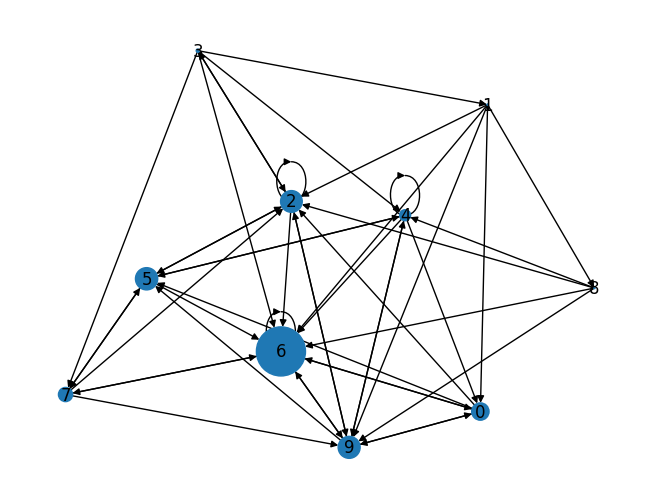

In [69]:
nx.draw_kamada_kawai(G, with_labels=True, node_size=pr**3*1e5)

# P9.6

# The Fiedler value is the second-smallest eigenvalue of the Laplacian matrix of a graph. It is used to evaluate network topology and its dynamics

Spectral Gap: 0.9999999999999997


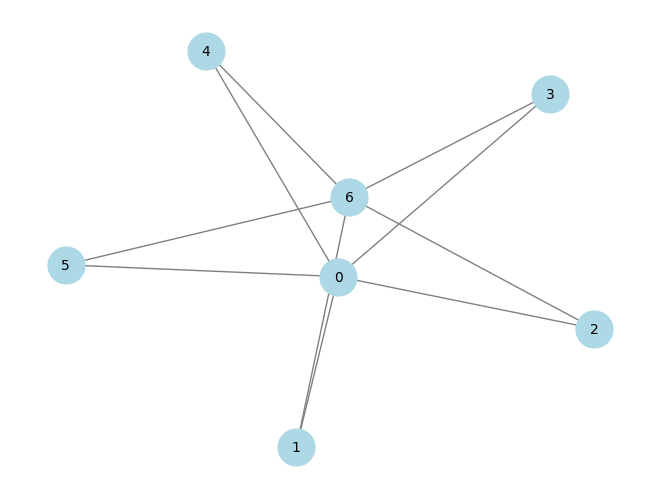

In [58]:
import networkx as nx
import numpy as np
from itertools import combinations

def compute_spectral_gap(graph):
    """Compute the spectral gap of the normalized Laplacian matrix."""
    laplacian = nx.normalized_laplacian_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(laplacian)
    eigenvalues = sorted(eigenvalues)
    return eigenvalues[1]  # Second-smallest eigenvalue (λ2)

def find_fastest_diffusion_graph(V, E):
    """
    Find a graph with V vertices and E edges where diffusion occurs fastest.
    """
    # Generate all graphs with V vertices and E edges
    candidate_graphs = []
    nodes = list(range(V))
    for edges in combinations(combinations(nodes, 2), E):
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if len(G.edges) == E:  # Ensure exact edge count
            candidate_graphs.append(G)

    # Find the graph with the largest spectral gap
    best_graph = None
    best_gap = -float("inf")
    for graph in candidate_graphs:
        gap = compute_spectral_gap(graph)
        if gap > best_gap:
            best_gap = gap
            best_graph = graph

    return best_graph, best_gap

# Example usage
V = 7  # Number of vertices
E = 10  # Number of edges
best_graph, spectral_gap = find_fastest_diffusion_graph(V, E)

# Visualize the best graph
nx.draw(best_graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
print("Spectral Gap:", spectral_gap)


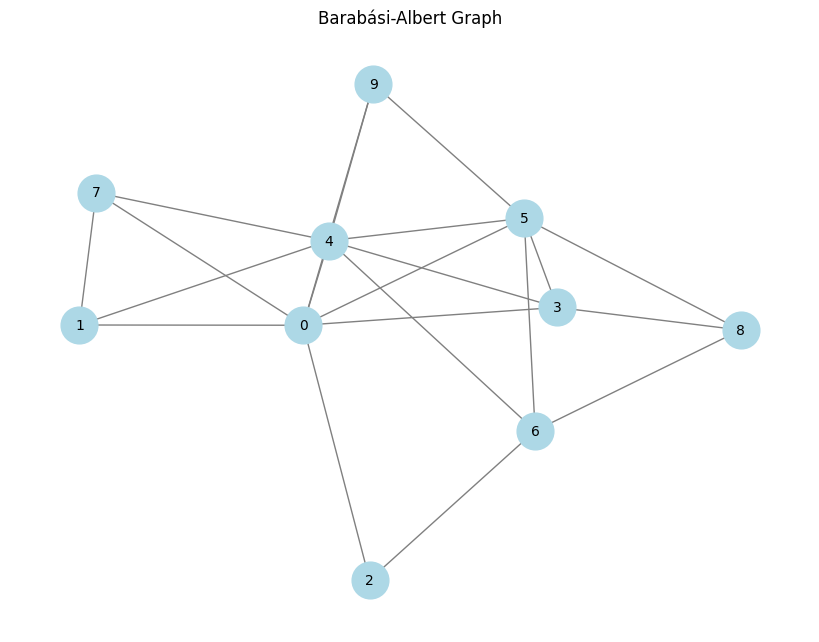

0.4734162705685407

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def compute_spectral_gap(graph):
    """Compute the spectral gap of the normalized Laplacian matrix."""
    laplacian = nx.normalized_laplacian_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(laplacian)
    eigenvalues = sorted(eigenvalues)
    return eigenvalues[1]  # Second-smallest eigenvalue (λ2)

# Generate a Barabási-Albert graph with specified parameters
V = 10  # Number of vertices
E = 3   # Number of edges to attach from a new node to existing nodes
barabasi_graph = nx.barabasi_albert_graph(V, E)

# Compute the spectral gap for the generated graph
spectral_gap = compute_spectral_gap(barabasi_graph)

# Visualize the Barabási-Albert graph
plt.figure(figsize=(8, 6))
nx.draw(barabasi_graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
plt.title("Barabási-Albert Graph")
plt.show()

spectral_gap


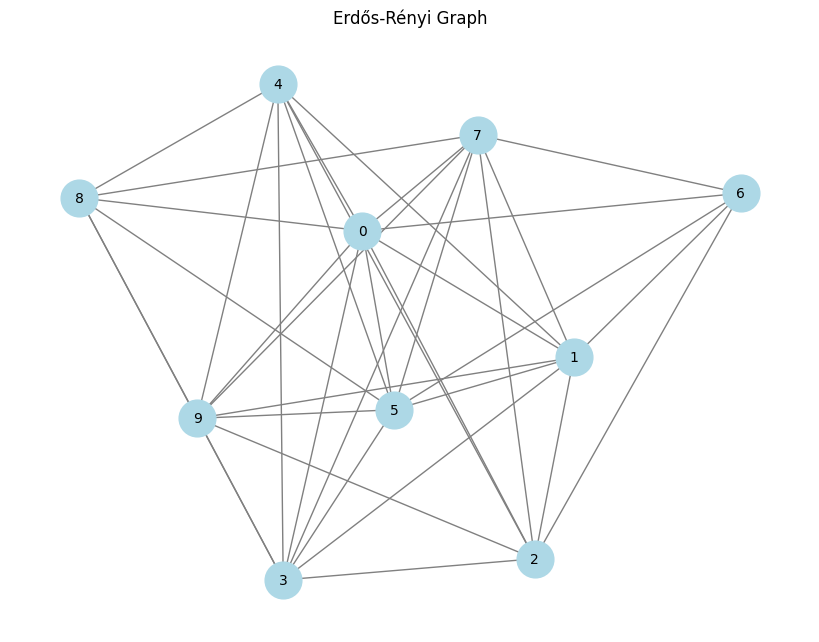

0.8023105943291967

In [55]:
# Generate an Erdős-Rényi graph with specified parameters
V = 10  # Number of vertices
p = 0.8  # Probability of edge creation

erdos_reyi_graph = nx.erdos_renyi_graph(V, p)

# Compute the spectral gap for the generated graph
erdos_reyi_spectral_gap = compute_spectral_gap(erdos_reyi_graph)

# Visualize the Erdős-Rényi graph
plt.figure(figsize=(8, 6))
nx.draw(erdos_reyi_graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
plt.title("Erdős-Rényi Graph")
plt.show()

erdos_reyi_spectral_gap


In [59]:
# Initialize parameters for comparison
vertex_counts = [10, 20, 30, 50]  # Different numbers of vertices
edge_probabilities = [0.2, 0.4, 0.6, 0.8]  # Different probabilities for Erdős-Rényi
edge_counts_barabasi = [1, 2, 3, 4, 7, 10]  # Different edges per new node for Barabási-Albert

# Store results for both models
comparison_results = []

# Compute spectral gaps for Barabási-Albert graphs
for V in vertex_counts:
    for E in edge_counts_barabasi:
        if E < V:  # Ensure valid Barabási-Albert configuration
            barabasi_graph = nx.barabasi_albert_graph(V, E)
            spectral_gap = compute_spectral_gap(barabasi_graph)
            comparison_results.append(("Barabási-Albert", V, E, spectral_gap))

# Compute spectral gaps for Erdős-Rényi graphs
for V in vertex_counts:
    for p in edge_probabilities:
        erdos_reyi_graph = nx.erdos_renyi_graph(V, p)
        spectral_gap = compute_spectral_gap(erdos_reyi_graph)
        comparison_results.append(("Erdős-Rényi", V, p, spectral_gap))

# Convert results to a DataFrame
comparison_df = pd.DataFrame(
    comparison_results,
    columns=["Model", "Vertices", "Edge Parameter", "Spectral Gap"]
)



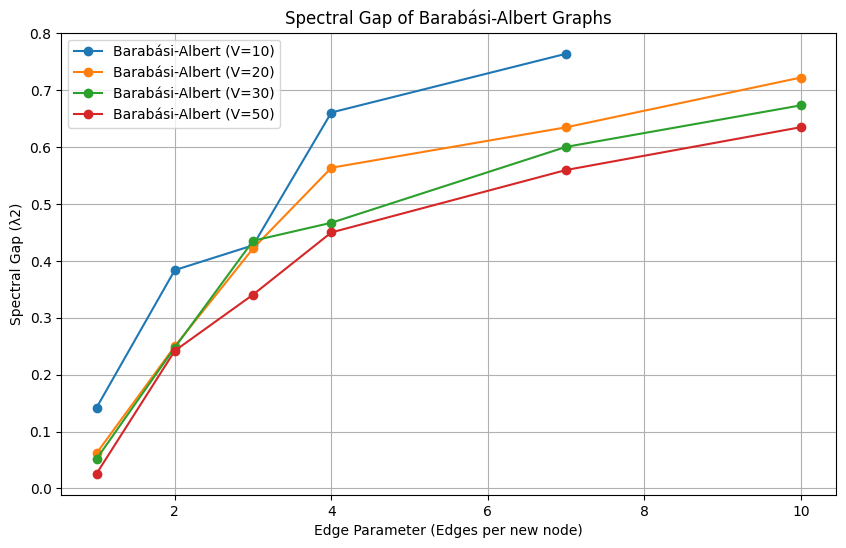

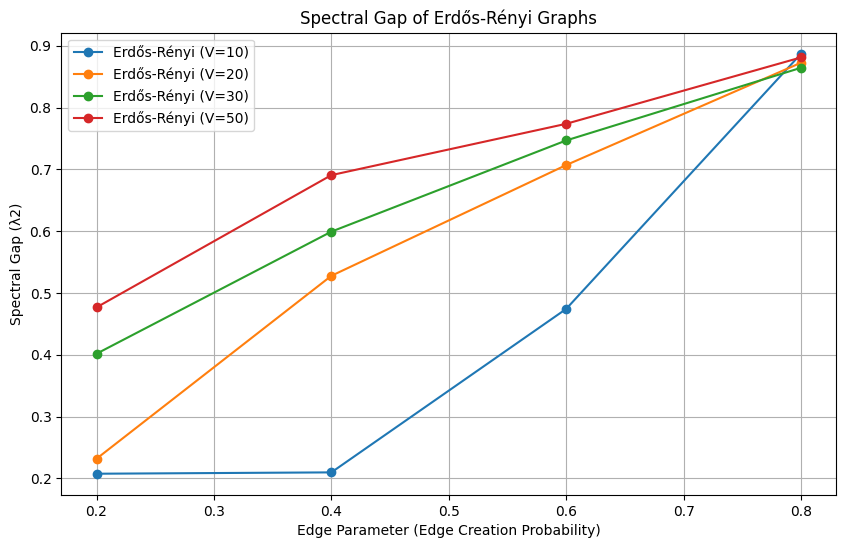

In [60]:
# Separate data for visualization
barabasi_data = comparison_df[comparison_df["Model"] == "Barabási-Albert"]
erdos_reyni_data = comparison_df[comparison_df["Model"] == "Erdős-Rényi"]

# Plot spectral gap for Barabási-Albert graphs
plt.figure(figsize=(10, 6))
for V in vertex_counts:
    data = barabasi_data[barabasi_data["Vertices"] == V]
    plt.plot(
        data["Edge Parameter"], data["Spectral Gap"], marker='o', linestyle='-', label=f'Barabási-Albert (V={V})'
    )

plt.xlabel("Edge Parameter (Edges per new node)")
plt.ylabel("Spectral Gap (λ2)")
plt.title("Spectral Gap of Barabási-Albert Graphs")
plt.legend()
plt.grid()
plt.show()

# Plot spectral gap for Erdős-Rényi graphs
plt.figure(figsize=(10, 6))
for V in vertex_counts:
    data = erdos_reyni_data[erdos_reyni_data["Vertices"] == V]
    plt.plot(
        data["Edge Parameter"], data["Spectral Gap"], marker='o', linestyle='-', label=f'Erdős-Rényi (V={V})'
    )

plt.xlabel("Edge Parameter (Edge Creation Probability)")
plt.ylabel("Spectral Gap (λ2)")
plt.title("Spectral Gap of Erdős-Rényi Graphs")
plt.legend()
plt.grid()
plt.show()
